In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import category_encoders as ce

# Part 1: Data Preprocessing and Exploration

In [2]:
data = pd.read_csv("data.csv")
data

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP
...,...,...,...,...,...,...,...,...,...
128056,27,Male,0,5.11456,7.764336,5.72341,2.686904,Arts,ESTP
128057,19,Male,0,3.00078,2.525392,4.71081,3.657814,Unknown,INFP
128058,26,Female,1,8.16219,3.433857,2.45531,5.541144,Arts,ENFP
128059,24,Male,0,9.37782,5.077443,1.79598,6.762643,Unknown,ENFJ


In [3]:
data

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP
...,...,...,...,...,...,...,...,...,...
128056,27,Male,0,5.11456,7.764336,5.72341,2.686904,Arts,ESTP
128057,19,Male,0,3.00078,2.525392,4.71081,3.657814,Unknown,INFP
128058,26,Female,1,8.16219,3.433857,2.45531,5.541144,Arts,ENFP
128059,24,Male,0,9.37782,5.077443,1.79598,6.762643,Unknown,ENFJ


In [4]:
data["Interest"].value_counts()

Interest
Unknown       48835
Arts          25489
Others        21733
Technology    19103
Sports        12901
Name: count, dtype: int64

In [5]:
data['Interest'] = data['Interest'].replace('Unknown', "Others")

In [6]:
missing_values = data.isnull().sum()
percentage = (missing_values / len(data)) * 100
print(percentage)

Age                   0.0
Gender                0.0
Education             0.0
Introversion Score    0.0
Sensing Score         0.0
Thinking Score        0.0
Judging Score         0.0
Interest              0.0
Personality           0.0
dtype: float64


## Encode categorical variables

In [7]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Education'] = le.fit_transform(data['Education'])
data = pd.get_dummies(data, columns=['Interest'], drop_first=True, dtype = "int")

## Normalize continuous variables

In [8]:
scaler = StandardScaler()
score_columns = ['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']
data[score_columns] = scaler.fit_transform(data[score_columns])

## Visualize distributions

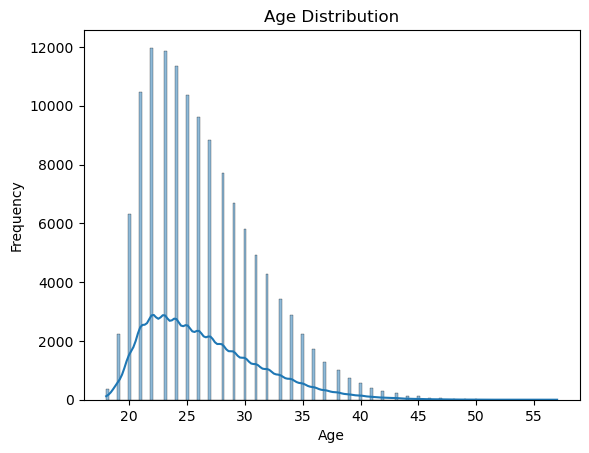

In [9]:
sns.histplot(data=data, x='Age', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('images/age_distribution.png', bbox_inches='tight')  # Save to the 'images' folder
plt.show()

## Correlation heatmap

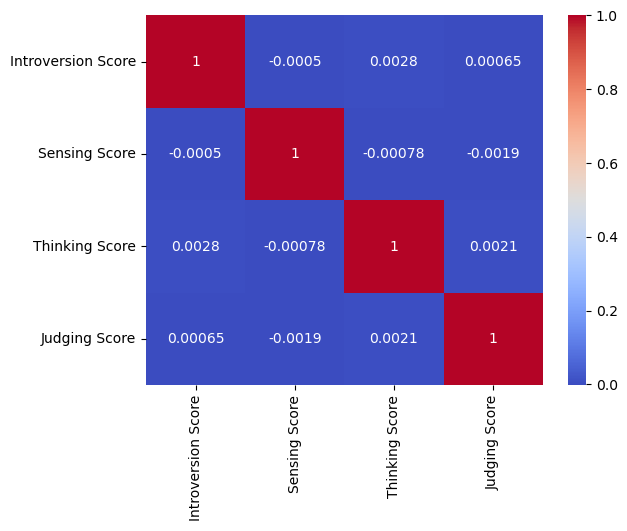

In [24]:
sns.heatmap(data[score_columns].corr(), annot=True, cmap='coolwarm')
plt.savefig('images/correlation heatmap.png', bbox_inches='tight')  
plt.show()

# Part 2: Model Building and Evaluation

In [11]:
X = data.drop(columns=['Personality'])
y = data['Personality']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train a Random Forest Classifier

In [13]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluate the model

In [14]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        ENFJ       0.93      0.93      0.93       799
        ENFP       0.92      0.94      0.93      6963
        ENTJ       0.93      0.92      0.92       531
        ENTP       0.92      0.92      0.92      4989
        ESFJ       0.80      0.87      0.83       101
        ESFP       0.85      0.84      0.84       981
        ESTJ       0.85      0.82      0.84        78
        ESTP       0.84      0.82      0.83       633
        INFJ       0.90      0.92      0.91       611
        INFP       0.91      0.90      0.90      4895
        INTJ       0.92      0.88      0.90       362
        INTP       0.89      0.89      0.89      3415
        ISFJ       0.89      0.67      0.76        75
        ISFP       0.82      0.79      0.81       670
        ISTJ       0.76      0.85      0.80        48
        ISTP       0.83      0.80      0.81       462

    accuracy                           0.91     25613
   macro avg       0.87   

In [15]:
X

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest_Others,Interest_Sports,Interest_Technology
0,19,1,0,1.548977,1.740607,0.363450,-0.156667,1,0,0
1,27,0,0,0.296866,0.911320,-1.449241,-0.256451,0,1,0
2,21,0,0,0.723446,-1.431215,-0.806013,0.394536,1,0,0
3,28,1,0,-1.030756,-0.218274,0.803258,1.011987,1,0,0
4,36,0,1,1.703455,-0.276203,0.113184,0.071085,0,0,1
...,...,...,...,...,...,...,...,...,...,...
128056,27,1,0,0.040910,2.267048,0.254805,-1.359170,0,0,0
128057,19,1,0,-0.690850,-2.160609,-0.096060,-0.661465,1,0,0
128058,26,0,1,1.095955,-1.392826,-0.877590,0.691914,0,0,0
128059,24,1,0,1.516789,-0.003760,-1.106047,1.569695,1,0,0


## Confusion Matrix

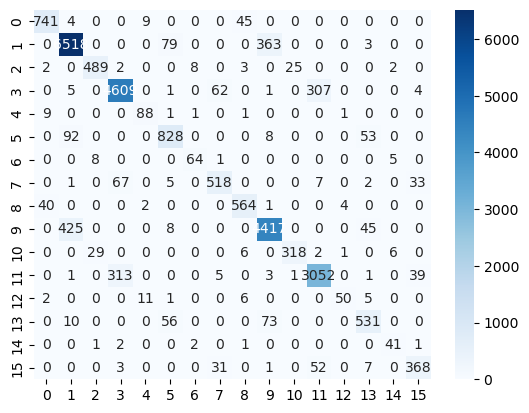

In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.savefig('images/Confusion Matrix.png', bbox_inches='tight')  
plt.show()

## Feature Importance

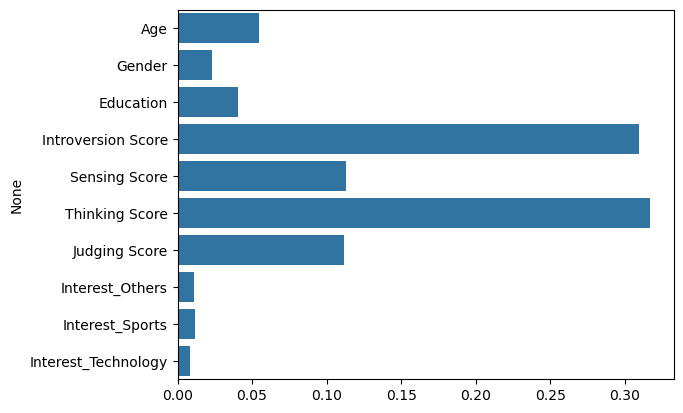

In [22]:
importances = rf.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.savefig('images/Feature Importance.png', bbox_inches='tight')  
plt.show()

In [18]:
correct_feature_names = ['Age', 'Gender', 'Education', 'Introversion Score', 
                         'Sensing Score', 'Thinking Score', 'Judging Score', 
                         'Interest_Others', 'Interest_Sports', 'Interest_Technology']
X_input = pd.DataFrame([[30, 0, 1, 1.548977, 0.911320, 0.803258, 
                         -1.359170, 1, 0, 0]], columns=correct_feature_names)
prediction = rf.predict(X_input)
print(prediction)

['ESTP']


## Key Findings:

### 1. Most Predictive Features:
- Introversion Score and Thinking Score were the most influential features (both around 0.30 importance)
- Sensing Score and Judging Score showed moderate importance (around 0.12-0.15)
- Demographic features (Age, Gender, Education) had relatively low importance (below 0.05)
- Interest categories (Sports, Technology, Others) showed minimal predictive power

### 2. Age Distribution:
- The dataset shows a right-skewed age distribution
- Majority of users are between 20-35 years old
- Peak concentration around 25 years old
- Fewer representations of users above 40

### 3. Personality Score Correlations:
- The correlation heatmap shows very weak correlations between different personality scores (all correlations < 0.01)
- Each personality dimension appears to be relatively independent of others

## Limitations:

### 1. Dataset Biases:
- Age bias: Strong representation of younger adults but limited data for older age groups
- Possible sampling bias due to uneven age distribution

### 2. Model Limitations:
- Heavy reliance on personality scores while demographic and interest features contribute minimally
- The weak correlations between personality scores might indicate potential measurement issues or noise in the data

### 3. Potential Challenges:
- The model might not perform well for outlier age groups
- Limited predictive power from interest categories suggests possible missing important features
- May not capture complex interactions between personality traits due to their independence

### 4. Generalizability Concerns:
- Results might not be representative of all age groups
- The model might be less effective for users with non-typical personality patterns
